# ITS307 Data Analytics : Spring Semester 2022
# Assignment 4

# Unsupervised Learning: Clustering

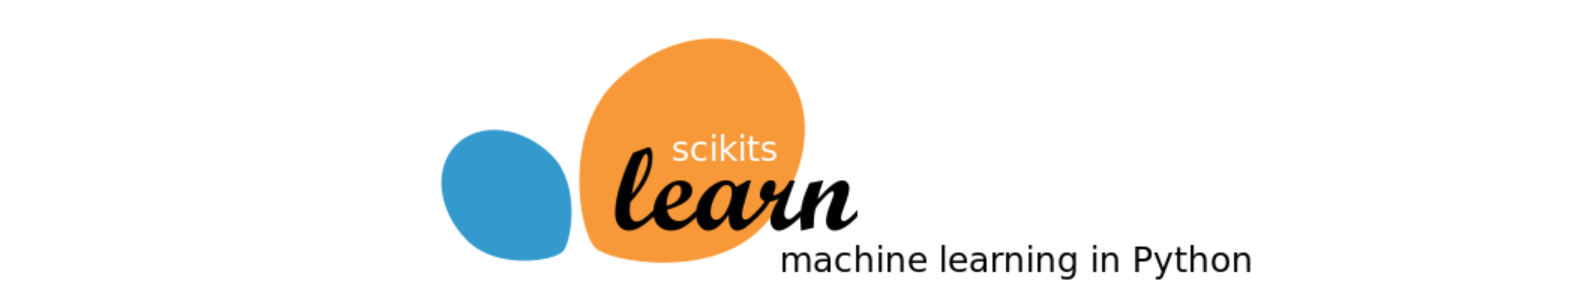

# Table of Contents 
<ol start="0">
<li> Part A </li>
<li> Part B </li>
<li> Part C</li>
</ol>

## Note: Handle null values and special characters if any.

# Part A

Instructions:
1. Read data from data1.csv file and give random column names such as A, B, C and so on.


2. Use both Elbow method and silhouette_score to find best value of K for KMean clustering. Justify your answer.


3. Create Kmean model with value of K chosen from second step. Evaluate your model and justify the goodness of your model.


In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [365]:
data1 = pd.read_csv('data1.csv' ,header=None,
                 names=['A','B','C','D','E','F','G','H','I','J','K','L','M'])

In [366]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       178 non-null    float64
 1   B       178 non-null    float64
 2   C       178 non-null    float64
 3   D       178 non-null    float64
 4   E       178 non-null    int64  
 5   F       178 non-null    float64
 6   G       178 non-null    float64
 7   H       178 non-null    float64
 8   I       178 non-null    float64
 9   J       178 non-null    float64
 10  K       178 non-null    float64
 11  L       178 non-null    float64
 12  M       178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [367]:
data1.isna().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
dtype: int64

In [368]:
data1.keys()

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'], dtype='object')

In [369]:
data1

A     B     C     D    E     F     G     H     I      J     K     L  \
0    14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04  3.92   
1    13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05  3.40   
2    13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03  3.17   
3    14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86  3.45   
4    13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04  2.93   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   ...   
173  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64  1.74   
174  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70  1.56   
175  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59  1.56   
176  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60  1.62   
177  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61  1.60   

        M  
0    1065  
1    1050  
2    1185  
3    1480  
4     735  
..    ...  
173   740  
174   750  
175   835  
176   840  
177   560  

[178 rows x 13 columns]

# Chosing K with Elbow Method

In [370]:
K = np.arange(1,10)
SSD = []
for k in K:
    kmean = KMeans(n_clusters= k)
    kmean.fit(data1)
    SSD.append(kmean.inertia_)

In [371]:
SSD

[17592296.383508474,
 4543749.614531861,
 2370689.686782968,
 1331903.0622637183,
 916379.1871539169,
 648422.2834974242,
 412137.50910045847,
 323223.24705426674,
 272977.02016618976]

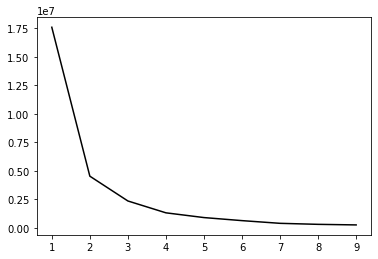

In [372]:
plt.plot(K,SSD, color = 'black')

# Silhouette Score

In [373]:
from sklearn.metrics import silhouette_score
sil_scores = []
K = np.arange(2,11)
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(data1)
    sil_scores.append(silhouette_score(data1,km.labels_,metric='euclidean'))

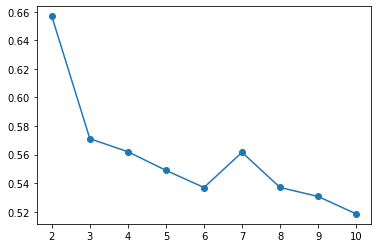

In [374]:
plt.plot(K,sil_scores,'-o')

In [375]:
sil_scores

[0.6568536504294317,
 0.571138193786884,
 0.5620323449580346,
 0.5489993239795681,
 0.5369781955369777,
 0.5616196384056887,
 0.5369913269089138,
 0.5307235924738344,
 0.5184924655418608]

### I would choose the k to be 4, because after doing the elbow elbow method and  checking the silhouettescore, I found that K = 4 is the best for this dataset.  

# Building Kmean model

### Now after taking the best value for K that is 4

In [376]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 4)
kmean.fit(data1)

KMeans(n_clusters=4)

In [377]:
kmean.labels_

array([3, 3, 1, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 3, 0, 0, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 3, 2, 2, 3, 3, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 3, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 3, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

In [378]:
kmean.cluster_centers_

array([[1.29328070e+01, 2.66192982e+00, 2.40315789e+00, 1.99807018e+01,
        1.01842105e+02, 2.04912281e+00, 1.46315789e+00, 4.01929825e-01,
        1.43350877e+00, 5.75333333e+00, 8.65087719e-01, 2.29631579e+00,
        6.97087719e+02],
       [1.38600000e+01, 1.79391304e+00, 2.50695652e+00, 1.70739130e+01,
        1.06000000e+02, 2.94304348e+00, 3.11086957e+00, 2.98695652e-01,
        1.92608696e+00, 6.26000000e+00, 1.10000000e+00, 3.03565217e+00,
        1.33856522e+03],
       [1.25042424e+01, 2.44318182e+00, 2.28378788e+00, 2.07772727e+01,
        9.24696970e+01, 2.07333333e+00, 1.79545455e+00, 3.84696970e-01,
        1.47181818e+00, 4.07242423e+00, 9.46212121e-01, 2.50484848e+00,
        4.52545455e+02],
       [1.35275000e+01, 1.92593750e+00, 2.37093750e+00, 1.77250000e+01,
        1.06500000e+02, 2.72500000e+00, 2.74250000e+00, 2.88750000e-01,
        1.87593750e+00, 4.98875000e+00, 1.04268750e+00, 3.08906250e+00,
        1.01743750e+03]])

In [379]:
kmean.inertia_

1331903.0622637183

In [380]:
data = [[14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065]]
kmean.predict(data)

array([3])

# Part B

### INSTRUCTIONS
1. Read data from data2.csv and give any random column names such as x,y.


2. Use appropriate techniques to find best choices of algorithm to apply to given dataset. Justify your choice.


3. Create clustering model from your choices of algorithm in step 2. Tune required hyperparameters to get expected clusters.


4. Use seaborn to plot your clusters using different markers and colors for each clusters formed.


5. Evaluate your model and justify the goodness of the cluster formed.

In [381]:
data2 = pd.read_csv('data2.csv' ,header=None,
                 names=['X','Y'])

In [382]:
data2

X         Y
0   1.481265 -1.058590
1   0.360573 -1.157805
2  -1.684897 -1.133287
3   1.946917 -1.187486
4   0.220311  0.844432
..       ...       ...
95 -0.629449 -1.154550
96  0.568445 -1.020870
97 -1.246518  0.914232
98  0.054276 -1.083626
99  0.527974  1.058545

[100 rows x 2 columns]

In [383]:
data2.isna().sum()

X    0
Y    0
dtype: int64

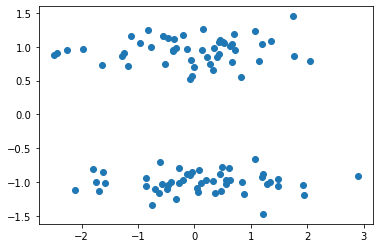

In [384]:
 plt.scatter(data2['X'],data2['Y'])

### I would choose DBSCAN algorithm for this dataset

In [385]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples=10)
dbscan.fit(data2) 

DBSCAN(eps=1, min_samples=10)

In [386]:
 DBSCAN(eps=1, min_samples=10)

DBSCAN(eps=1, min_samples=10)

In [387]:
dbscan.labels_

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [388]:
data2['dbscan'] = dbscan.labels_
data2.head()

X         Y  dbscan
0  1.481265 -1.058590       0
1  0.360573 -1.157805       0
2 -1.684897 -1.133287       0
3  1.946917 -1.187486       0
4  0.220311  0.844432       1

In [389]:
db0 = data2[data2.dbscan == 0]
db0

X         Y  dbscan
0   1.481265 -1.058590       0
1   0.360573 -1.157805       0
2  -1.684897 -1.133287       0
3   1.946917 -1.187486       0
5   1.344560 -0.991684       0
9  -0.127784 -0.886818       0
12 -0.200310 -0.969621       0
18  0.619852 -0.797663       0
20 -1.789891 -0.805547       0
21  0.621896 -0.961937       0
24 -0.692869 -1.096386       0
26 -0.854154 -0.938174       0
27  0.211704 -0.969044       0
29  0.065581 -1.145136       0
30 -0.422355 -0.994261       0
33  0.328194 -0.983126       0
34  0.459635 -0.874605       0
36  0.884688 -1.179066       0
38  0.080422 -0.813900       0
39 -0.482695 -1.106132       0
40  0.120291 -1.019733       0
41  1.925632 -1.044991       0
45 -0.572592 -1.025976       0
49  1.217498 -0.874440       0
52 -1.628400 -0.848990       0
53 -0.035051 -0.854400       0
58 -0.073513 -0.891316       0
59  1.214351 -1.470430       0
60  2.901658 -0.904749       0
63 -1.744683 -1.002924       0
64 -0.469165 -1.037621       0
66 -1.585100 -1.016644       0
68 -0.324355 -1.250308       0
70 -0.267692 -0.797579       0
71 -0.280403 -1.017546       0
72  0.843056 -0.991503       0
73  1.075131 -0.659427       0
75 -0.849795 -1.050491       0
76 -0.616769 -0.700899       0
78 -2.116545 -1.120555       0
80  0.557862 -0.970139       0
81 -0.747614 -1.333169       0
82  1.195578 -0.924519       0
85  0.475711 -1.138781       0
87  0.493503 -0.777093       0
88  1.479808 -0.956376       0
92  1.286924 -1.031083       0
95 -0.629449 -1.154550       0
96  0.568445 -1.020870       0
98  0.054276 -1.083626       0

In [390]:
db1 = data2[data2.dbscan == 1]
db1

X         Y  dbscan
4   0.220311  0.844432       1
6  -1.125771  1.161369       1
7  -0.524397  0.744974       1
8   1.743963  1.451582       1
10  0.498376  1.075230       1
11  0.445149  1.103469       1
13 -0.205194  1.169080       1
14 -0.324863  0.978861       1
15 -0.037008  0.573433       1
16 -0.353383  1.122336       1
17 -0.560019  1.158396       1
19  1.354589  1.079199       1
22  0.695828  1.185640       1
23 -1.184455  0.716058       1
25  2.050860  0.796604       1
28 -0.776129  0.999526       1
31  1.195711  1.039549       1
32  0.623419  1.014208       1
35  0.665799  0.769330       1
37  0.282928  0.746593       1
42  0.433988  1.076732       1
43 -1.628902  0.728022       1
44 -0.381451  0.930756       1
46  1.140726  0.787535       1
47  1.074098  1.226520       1
48 -0.471298  1.127674       1
50  0.151980  1.257947       1
51 -1.290931  0.870028       1
54  0.830331  0.555655       1
55  0.396007  0.841736       1
56 -2.258585  0.951289       1
57 -0.072489  0.527428       1
61  0.333874  0.651273       1
62 -0.968624  1.051457       1
65  0.126778  0.958348       1
67  0.714674  0.946064       1
69 -0.056689  0.806439       1
74 -0.381291  0.956361       1
77  1.769429  0.867600       1
79 -0.003041  0.699364       1
83 -1.974124  0.974200       1
84  0.344681  0.986547       1
86 -0.828259  1.243274       1
89 -2.432426  0.901117       1
90  0.669419  1.047408       1
91  0.437334  0.900450       1
93 -2.491898  0.884051       1
94 -0.132395  0.969063       1
97 -1.246518  0.914232       1
99  0.527974  1.058545       1

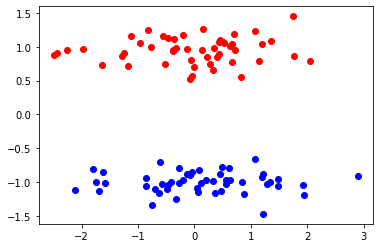

In [391]:
plt.scatter(db0['X'],db0['Y'],color='blue')
plt.scatter(db1['X'],db1['Y'],color='red')

In [392]:
sil_score = silhouette_score(data2, dbscan.labels_, metric='euclidean')
sil_score

0.5328538619159733

In [393]:
K = np.arange(2,10)
sil_score = []
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(data2)
    sil_score.append(silhouette_score(data2,km.labels_))

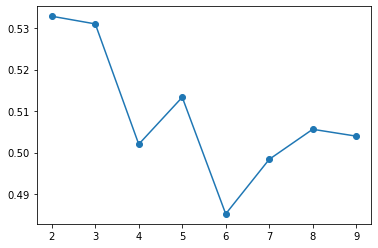

In [394]:
plt.plot(K,sil_score,'-o')

# Part C

### INSTRUCTIONS:

1. Read data from data3.csv and name columns as x and y.


2. Assuming 4 clusters in the given datasets, compare both clustering algorithm and mention which algorithm is more suitable.


3. Use seaborn to plot your clusters for both the algorithms.

In [395]:
data3 = pd.read_csv('data3.csv' ,header=None,
                 names=['X','Y'])

In [396]:
data3

X          Y
0  -4.394278   9.986850
1  -3.446856  -0.340388
2  -2.924456  -0.115665
3  -4.533322   2.782269
4  -4.257819   8.498752
..       ...        ...
95 -6.005893   0.197806
96  0.180038   6.898378
97 -5.744999  12.434546
98 -3.816837  -2.081060
99 -1.436312   9.332665

[100 rows x 2 columns]

In [397]:
data3.isna().sum()

X    0
Y    0
dtype: int64

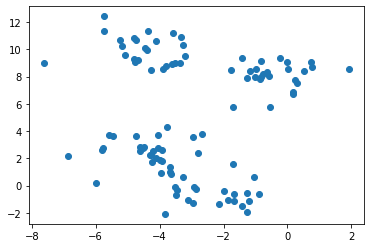

In [398]:
plt.scatter(data3['X'],data3['Y'])

# Training  model with Kmean


In [399]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=4)
kmean.fit(data3)

KMeans(n_clusters=4)

In [400]:
kmean.labels_


array([3, 2, 2, 0, 3, 2, 3, 1, 0, 1, 1, 3, 3, 1, 1, 0, 0, 3, 0, 2, 2, 3,
       2, 1, 3, 1, 3, 1, 1, 2, 3, 0, 2, 0, 1, 0, 1, 1, 0, 0, 3, 3, 1, 3,
       2, 0, 3, 1, 2, 3, 1, 0, 3, 2, 1, 1, 0, 0, 1, 1, 0, 0, 3, 3, 2, 2,
       1, 0, 3, 0, 0, 0, 3, 3, 2, 3, 0, 0, 0, 2, 2, 2, 0, 3, 0, 1, 2, 0,
       2, 3, 0, 2, 0, 1, 1, 0, 1, 3, 2, 1])

In [401]:
data3['cluster'] = kmean.labels_
data3.head()

X         Y  cluster
0 -4.394278  9.986850        3
1 -3.446856 -0.340388        2
2 -2.924456 -0.115665        2
3 -4.533322  2.782269        0
4 -4.257819  8.498752        3

In [402]:
data = [[-4.394278,9.986850]]
kmean.predict(data)

array([3])

In [403]:
cluster0 = data3[data3.cluster == 0]

In [404]:
cluster1 = data3[data3.cluster == 1]

In [405]:
cluster2 = data3[data3.cluster == 2]

In [406]:
cluster3 = data3[data3.cluster == 3]

In [407]:
kmean.cluster_centers_

array([[-4.36659854,  2.45837114],
       [-0.39233905,  8.09893604],
       [-2.26100823, -0.63792927],
       [-4.46343585,  9.96867608]])

In [408]:
center = pd.DataFrame(kmean.cluster_centers_ ,columns =['x','y'] )
center

x         y
0 -4.366599  2.458371
1 -0.392339  8.098936
2 -2.261008 -0.637929
3 -4.463436  9.968676

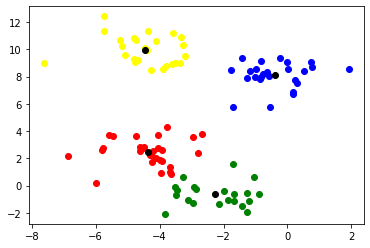

In [409]:
plt.scatter(cluster0['X'], cluster0['Y'], color= 'red')
plt.scatter(cluster1['X'], cluster1['Y'], color= 'blue')
plt.scatter(cluster2['X'], cluster2['Y'], color= 'green')
plt.scatter(cluster3['X'], cluster3['Y'], color= 'yellow')
plt.scatter(center.x, center.y, color= 'black')

In [417]:
sil_sc = silhouette_score(data3, kmean.labels_, metric='euclidean')
sil_sc

0.6356453657358099

# Training  model with DBSCAN

In [410]:
data3_db = data3.drop('cluster',axis=1)

In [411]:
data3_db

X          Y
0  -4.394278   9.986850
1  -3.446856  -0.340388
2  -2.924456  -0.115665
3  -4.533322   2.782269
4  -4.257819   8.498752
..       ...        ...
95 -6.005893   0.197806
96  0.180038   6.898378
97 -5.744999  12.434546
98 -3.816837  -2.081060
99 -1.436312   9.332665

[100 rows x 2 columns]

In [412]:
from sklearn.cluster import DBSCAN
dbscan3 = DBSCAN(eps=1,min_samples=4)
dbscan3.fit(data3_db) 

DBSCAN(eps=1, min_samples=4)

In [413]:
dbscan3.labels_

array([ 0,  1,  1,  1,  0,  1,  0,  2,  1,  2,  2,  0,  0,  2,  2,  1,  1,
        0,  1,  1,  1,  0,  1,  2,  0,  2,  0,  2,  2,  1,  0,  1,  1,  1,
        2, -1,  2,  2,  1,  1,  0,  0,  2,  0,  1,  1,  0,  2,  1,  0,  2,
        1,  0,  1, -1,  2,  1,  1,  2,  2,  1,  1, -1,  0, -1,  1, -1,  1,
        0,  1,  1,  1,  0,  0,  1,  0,  1,  1, -1,  1,  1,  1,  1,  0, -1,
        2, -1,  1,  1,  0,  1,  1, -1, -1,  2, -1,  2, -1, -1,  2],
      dtype=int64)

In [414]:
data3_db['dbscan'] = dbscan3.labels_
data3_db.head()

X         Y  dbscan
0 -4.394278  9.986850       0
1 -3.446856 -0.340388       1
2 -2.924456 -0.115665       1
3 -4.533322  2.782269       1
4 -4.257819  8.498752       0

In [415]:
db_1 = data3_db[data3_db.dbscan ==  -1]
db0 = data3_db[data3_db.dbscan ==  0]
db1 = data3_db[data3_db.dbscan ==  1]
db2 = data3_db[data3_db.dbscan ==  2]
db3 = data3_db[data3_db.dbscan ==  3]


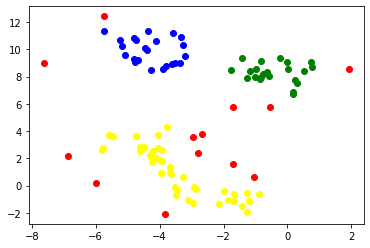

In [416]:
plt.scatter(db_1['X'],db_1['Y'],color='red')
plt.scatter(db0['X'],db0['Y'],color='blue')
plt.scatter(db1['X'],db1['Y'],color='yellow')
plt.scatter(db2['X'],db2['Y'],color='green')
plt.scatter(db3['X'],db3['Y'],color='cyan')

In [418]:
sil_sc_Db = silhouette_score(data3_db, dbscan3.labels_, metric='euclidean')
sil_sc_Db

0.49198264395726377

### Now after checking both Kmean and DBscan, the Silhouette score I got in kmean is better than the silhouette score I got in dbscan. For this dataset, Kmean would be a better algorithm. From the beginning, I knew that KMean would be better because of the scatter plot for this dateset. As the data points were is clusters, I knew that the Kmean would work best for this dataset. 